<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploring-optimisation-of-analytic-functions" data-toc-modified-id="Exploring-optimisation-of-analytic-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploring optimisation of analytic functions</a></span></li><li><span><a href="#Optimisation-of-a-SVM-on-real-data" data-toc-modified-id="Optimisation-of-a-SVM-on-real-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Optimisation of a SVM on real data</a></span><ul class="toc-item"><li><span><a href="#SGD" data-toc-modified-id="SGD-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>SGD</a></span></li><li><span><a href="#Adam" data-toc-modified-id="Adam-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Adam</a></span></li><li><span><a href="#PCA-Visualization" data-toc-modified-id="PCA-Visualization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>PCA Visualization</a></span><ul class="toc-item"><li><span><a href="#SGD" data-toc-modified-id="SGD-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>SGD</a></span></li><li><span><a href="#Adam" data-toc-modified-id="Adam-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Adam</a></span></li></ul></li></ul></li></ul></div>

# Lab 3 Exercise - Optimise it!

In [1]:
import torch
import torch.optim as optim
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from celluloid import Camera
import seaborn as sns
import math
import pandas as pd
import warnings
from IPython.display import HTML
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
sns.set()

## Exploring optimisation of analytic functions

In [2]:
A = 1
def rastrigin(X): 
    return A*len(X) + sum([(x**2 - A * torch.cos(2 * math.pi * x)) for x in X])

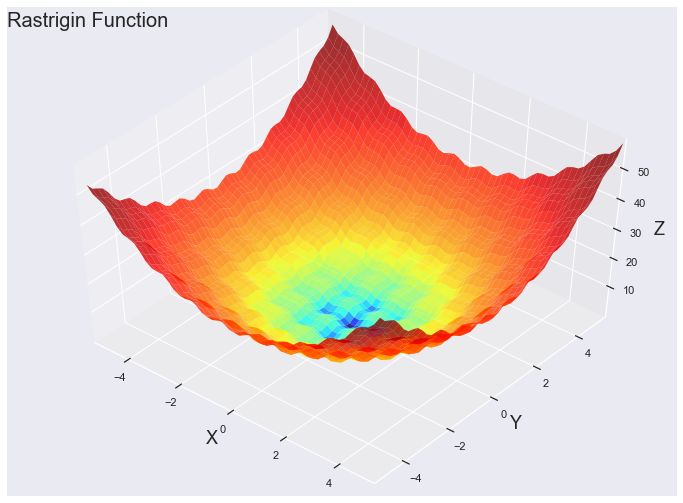

In [48]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()

fig = plt.figure(figsize=(12, 9))
ax = plt.axes(projection='3d', elev=50, azim=-50)
ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_zlabel('Z', fontsize=18)

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
ax.set_title("Rastrigin Function", loc='left', pad=-19.5, fontsize=20)
plt.savefig("Rastrigin.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

In [9]:
def function_optimization(p, opt, name):
    xmin, xmax, xstep = -5.12, 5.12, .2
    ymin, ymax, ystep = -5.12, 5.12, .2
    x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
    z = rastrigin(torch.tensor([x, y])).numpy()

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

    path = np.empty((2,0))
    path = np.append(path, p.data.numpy(), axis=1)
    Itern = 100
    Eplot = np.zeros((Itern, 1))
    for i in range(Itern):
        opt.zero_grad()
        output = rastrigin(p)
        output.backward()
        opt.step()
        Eplot[i] = output.data.numpy()
        path = np.append(path, p.data.numpy(), axis=1)

    plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    ax.plot(path[0], path[1], color='red', label=name, linewidth=2)
    ax.legend()
    ax.set_xlabel('X', fontsize=18)
    ax.set_ylabel('Y', fontsize=18)
    ax.set_title(name + ' Path', fontsize=20)
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    plt.savefig(name+ "_path.svg", format='svg', dpi=1200, bbox_inches='tight')
    plt.show()
    
    print("Arrival Point: ", list(p.tolist()))
    print("Final Loss: ", Eplot[Itern-1])
    plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Eplot)
    plt.title(name + " Loss Plot", fontsize=20)
    plt.xlabel("Iteration Number", fontsize=18)
    plt.ylabel("Loss", fontsize=18)
    plt.savefig(name+ "_loss.svg", format='svg', dpi=1200, bbox_inches='tight')
    plt.show();

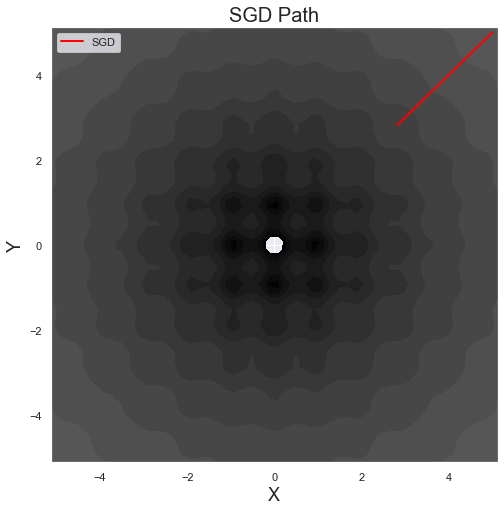

<Figure size 480x480 with 0 Axes>

Arrival Point:  [[2.8223698139190674], [2.8223698139190674]]
Final Loss:  [17.05313301]


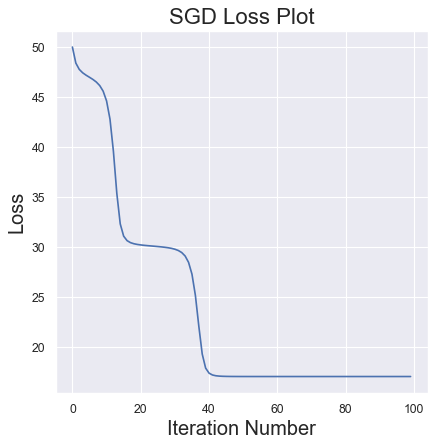

In [10]:
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)
function_optimization(p, opt, 'SGD')

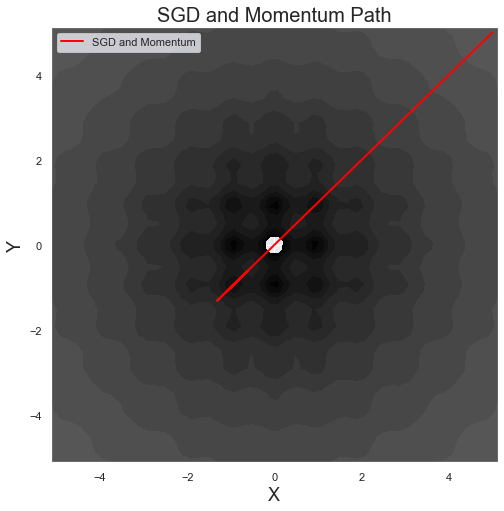

<Figure size 480x480 with 0 Axes>

Arrival Point:  [[-0.9469558596611023], [-0.9469558596611023]]
Final Loss:  [1.90455127]


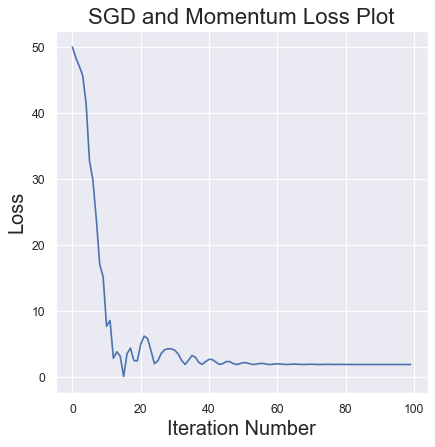

In [11]:
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)
function_optimization(p, opt, 'SGD and Momentum')

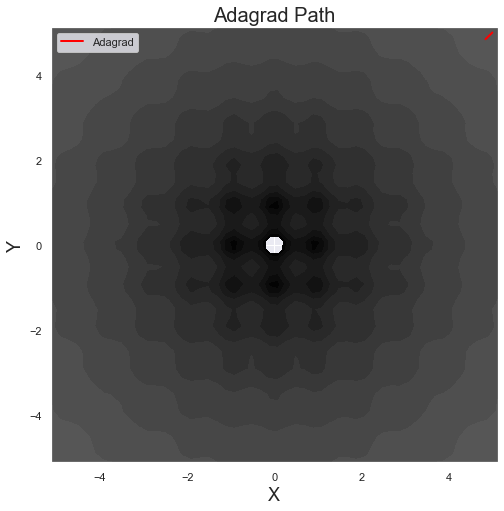

<Figure size 480x480 with 0 Axes>

Arrival Point:  [[4.842288494110107], [4.842288494110107]]
Final Loss:  [47.80606842]


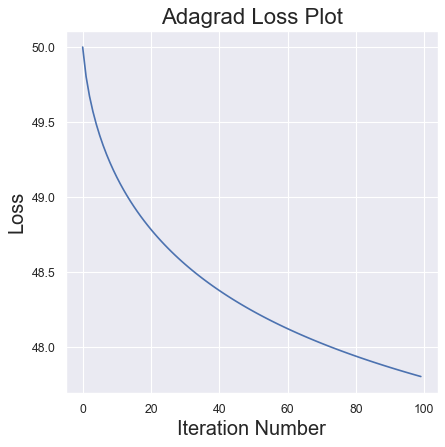

In [12]:
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)
function_optimization(p, opt, 'Adagrad')

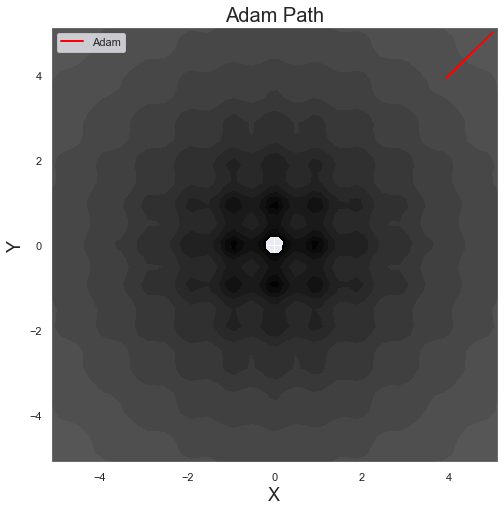

<Figure size 480x480 with 0 Axes>

Arrival Point:  [[3.938631772994995], [3.938631772994995]]
Final Loss:  [31.29665375]


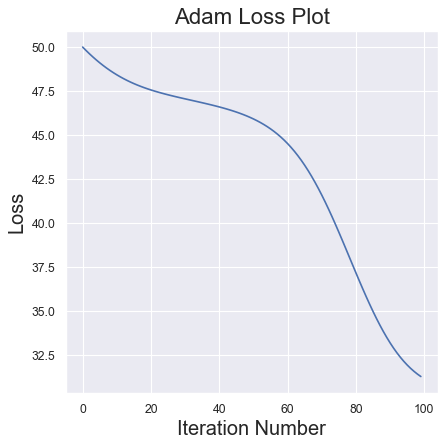

In [13]:
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adam([p], lr=0.01)
function_optimization(p, opt, 'Adam')

In [14]:
def function_optimization2(p, opt):
    path = np.empty((2,0))
    path = np.append(path, p.data.numpy(), axis=1)
    Itern = 100
    Eplot = np.zeros((Itern, 1))
    for i in range(Itern):
        opt.zero_grad()
        output = rastrigin(p)
        output.backward()
        opt.step()
        Eplot[i] = output.data.numpy()
        path = np.append(path, p.data.numpy(), axis=1)
        
    return path, Eplot

SGD Arrival Point:  [2.8223698139190674, 2.8223698139190674]
SGD Final Loss:  [17.05313301]
SGD and Momentum Arrival Point:  [-0.9469558596611023, -0.9469558596611023]
SGD and Momentum Final Loss:  [1.90455127]
Adagrad Arrival Point:  [4.842288494110107, 4.842288494110107]
Adagrad Final Loss:  [47.80606842]
Adam Arrival Point:  [3.938631772994995, 3.938631772994995]
Adam Final Loss:  [31.29665375]


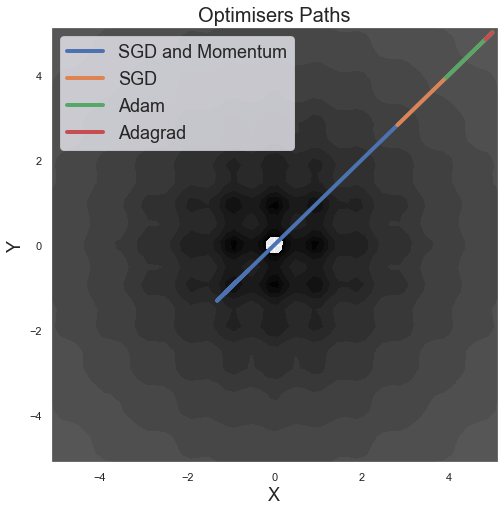

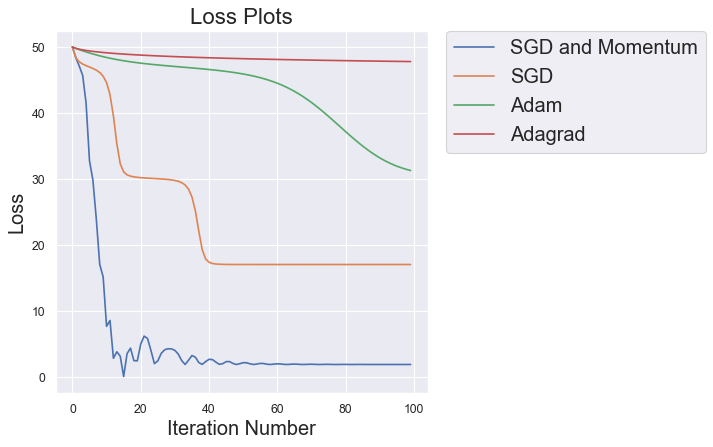

In [47]:
name1, name2, name3, name4 = 'SGD', 'SGD and Momentum', 'Adagrad', 'Adam'
p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01)
path1, Eplot1 = function_optimization2(p, opt)

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.SGD([p], lr=0.01, momentum=0.9)
path2, Eplot2 = function_optimization2(p, opt)

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adagrad([p], lr=0.01)
path3, Eplot3 = function_optimization2(p, opt)

p = torch.tensor([[5.0],[5.0]], requires_grad=True)
opt = optim.Adam([p], lr=0.01)
path4, Eplot4 = function_optimization2(p, opt)

print(name1, "Arrival Point: ", list(path1[:, 100].tolist()))
print(name1, "Final Loss: ", Eplot1[100-1])
print(name2, "Arrival Point: ", list(path2[:, 100].tolist()))
print(name2, "Final Loss: ", Eplot2[100-1])
print(name3, "Arrival Point: ", list(path3[:, 100].tolist()))
print(name3, "Final Loss: ", Eplot3[100-1])
print(name4, "Arrival Point: ", list(path4[:, 100].tolist()))
print(name4, "Final Loss: ", Eplot4[100-1])


xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()

fig, ax = plt.subplots(figsize=(8, 8))
ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.gray)

#plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
ax.plot(path2[0], path2[1], label=name2, linewidth=4)
ax.plot(path1[0], path1[1], label=name1, linewidth=4)
ax.plot(path4[0], path4[1], label=name4, linewidth=4)
ax.plot(path3[0], path3[1], label=name3, linewidth=4)
ax.legend(fontsize=18)
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Optimisers Paths', fontsize=20)
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.savefig("path.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()


plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Eplot2, label=name2)
plt.plot(Eplot1, label=name1)
plt.plot(Eplot4, label=name4)
plt.plot(Eplot3, label=name3)
plt.legend(fontsize=18, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Loss Plots", fontsize=20)
plt.xlabel("Iteration Number", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.savefig("loss.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show();

## Optimisation of a SVM on real data


In [116]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' + 'iris/iris.data', header=None)
df = df.sample(frac = 1, random_state = 0) #shuffle
df = df[df[4].isin(['Iris-virginica', 'Iris-versicolor'])] # filter
# add label indices column
mapping = {k : v for v , k in enumerate(df[4].unique())}
df[5] = (2*df[4].map(mapping)) - 1 #labels in {−1 ,1}
# normalise data
alldata = torch.tensor(df.iloc[:,[0,1,2,3]].values, dtype=torch.float)
alldata = (alldata - alldata.mean(dim=0))/alldata.var(dim=0)
# createdatasets
targetstr = torch.tensor(df.iloc[:75,5].values, dtype=torch.long)
targetsva = torch.tensor(df.iloc[75:,5].values, dtype=torch.long)
datatr = alldata[:75]
datava = alldata[75:]

In [117]:
def hinge_loss(y_pred, y_true):
    return torch.mean(torch.max(torch.tensor(0, dtype=torch.float, requires_grad=True), 1-y_pred*y_true))

def svm(x, w, b):
    h = (w*x).sum(1) + b
    return h

In [202]:
def svm_test(X, Y, opt, w, b, name):
    dataset = data.TensorDataset(X, Y) # create your datset
    dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader
    Eplot = np.zeros((100, 1))
    Aplot = np.zeros((100, 1))
    for epoch in range(100):
        scores, errors = [], []
        for i, batch in enumerate(dataloader):
            opt.zero_grad()
            y_pred = svm(batch[0], w, b)
            
            y_target = [1 if i > 0 else -1 for i in y_pred]
            scores.append(accuracy_score(batch[1].detach().numpy(), y_target))
            
            output = hinge_loss(y_pred, batch[1].float())
            errors.append(output.data.numpy())
            
            output.backward()
            opt.step()
            
        Aplot[epoch] = np.mean(scores)
        Eplot[epoch] = sum(errors)/(i+1)

    print("Final Loss: ", Eplot[99][0])
    plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Eplot)
    plt.title("Loss Plot (" + name +")", fontsize=20)
    plt.xlabel("Iteration Number", fontsize=18)
    plt.ylabel("Loss", fontsize=18)
    plt.savefig(name+"_loss.svg", format='svg', dpi=1200, bbox_inches='tight')
    
    print("Final Accuracy: ", Aplot[99][0])
    plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Aplot)
    plt.title("Training Accuracy (" + name +")", fontsize=20)
    plt.xlabel("Iteration Number", fontsize=18)
    plt.ylabel("Accuracy (%)", fontsize=18)
    plt.savefig(name+"_acc.svg", format='svg', dpi=1200, bbox_inches='tight')
    
    return w, b

### SGD

Final Loss:  0.16843595604101816
Final Accuracy:  0.9333333333333332


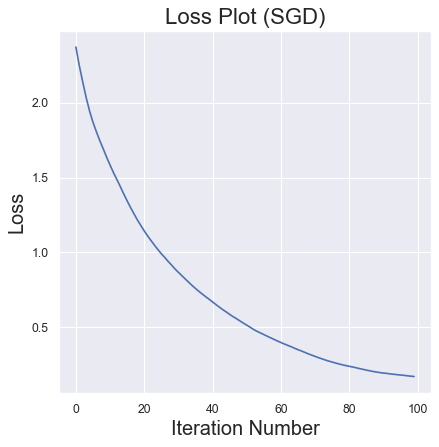

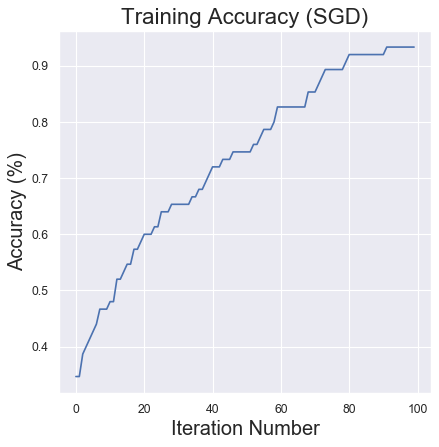

In [208]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew = svm_test(datatr, targetstr, opt, w, b, "SGD")

In [209]:
y_target = svm(datatr, wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetstr.detach().numpy(), y_target)

0.9333333333333333

In [210]:
y_target = svm(datava, wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetsva.detach().numpy(), y_target)

0.84

### Adam

Final Loss:  0.05889974907040596
Final Accuracy:  0.9866666666666667


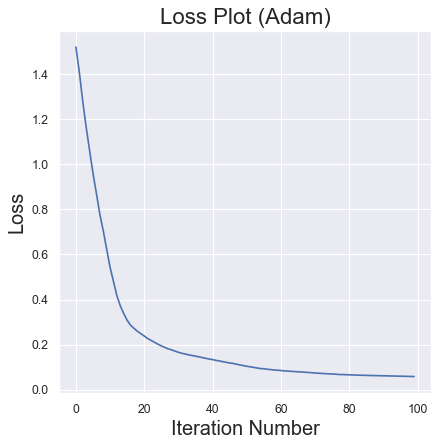

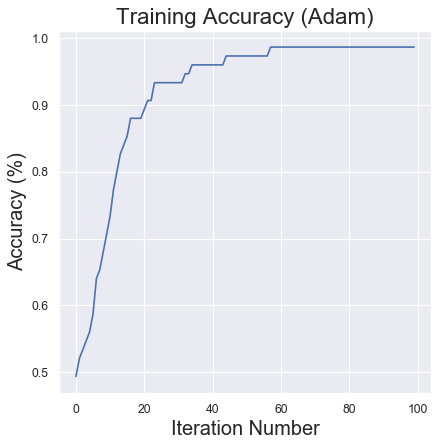

In [211]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew = svm_test(datatr, targetstr, opt, w, b, "Adam")

In [212]:
y_target = svm(datatr, wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetstr.detach().numpy(), y_target)

0.9866666666666667

In [213]:
y_target = svm(datava, wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetsva.detach().numpy(), y_target)

0.88

### SVM Plot

In [214]:
def svm_test(X, Y, opt, w, b, name):
    dataset = data.TensorDataset(X, Y) # create your datset
    dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader
    Eplot = np.zeros((100, 1))
    Aplot = np.zeros((100, 1))
    for epoch in range(100):
        scores, errors = [], []
        for i, batch in enumerate(dataloader):
            opt.zero_grad()
            y_pred = svm(batch[0], w, b)
            
            y_target = [1 if i > 0 else -1 for i in y_pred]
            scores.append(accuracy_score(batch[1].detach().numpy(), y_target))
            
            output = hinge_loss(y_pred, batch[1].float())
            errors.append(output.data.numpy())
            
            output.backward()
            opt.step()
            
        Aplot[epoch] = np.mean(scores)
        Eplot[epoch] = sum(errors)/(i+1)
    
    return w, b, Aplot, Eplot

SGD Final Loss:  0.1639229580760002
Adam Final Loss:  0.11963796988129616
SGD Final Accuracy:  0.9466666666666667
ADAM Final Accuracy:  0.9733333333333333


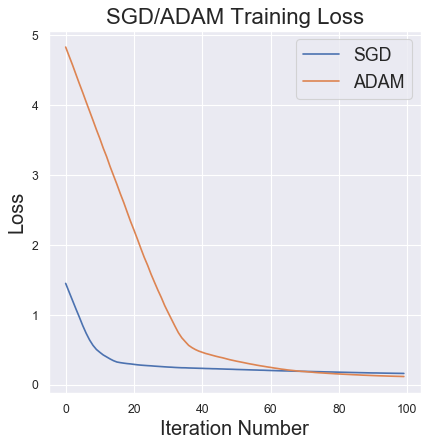

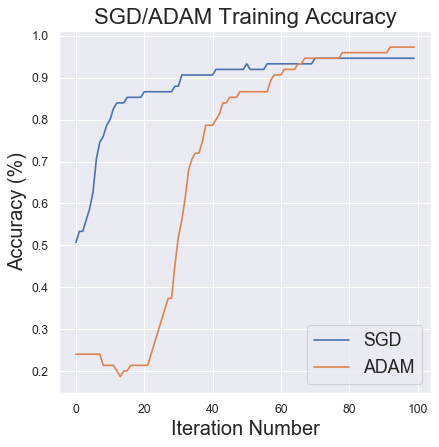

In [220]:
w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew, A_sgd, E_sgd = svm_test(datatr, targetstr, opt, w, b, "SGD")

w = torch.randn(1, 4, requires_grad=True)
b = torch.randn(1, requires_grad=True)
opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew, A_ad, E_ad = svm_test(datatr, targetstr, opt, w, b, "Adam")

print("SGD Final Loss: ", E_sgd[99][0])
print("Adam Final Loss: ", E_ad[99][0])
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(E_sgd, label='SGD')
plt.plot(E_ad, label='ADAM')
plt.legend(fontsize=16)
plt.title("SGD/ADAM Training Loss", fontsize=20)
plt.xlabel("Iteration Number", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.savefig("train_loss.svg", format='svg', dpi=1200, bbox_inches='tight')

print("SGD Final Accuracy: ", A_sgd[99][0])
print("ADAM Final Accuracy: ", A_ad[99][0])
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(A_sgd, label='SGD')
plt.plot(A_ad, label='ADAM')
plt.legend(fontsize=16)
plt.title("SGD/ADAM Training Accuracy", fontsize=20)
plt.xlabel("Iteration Number", fontsize=18)
plt.ylabel("Accuracy (%)", fontsize=18)
plt.savefig("train_acc.svg", format='svg', dpi=1200, bbox_inches='tight')

### Hist Report

In [222]:
tr_acc_sgd, tr_acc_ad = [], []
va_acc_sgd, va_acc_ad = [], []
for i in range(0, 500):
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
    wnew, bnew, A_sgd, E_sgd = svm_test(datatr, targetstr, opt, w, b, "SGD")
    y_target = svm(datava, wnew, bnew)
    y_target = [1 if i > 0 else -1 for i in y_target]
    tr_acc_sgd.append(A_sgd[99][0])
    va_acc_sgd.append(accuracy_score(targetsva.detach().numpy(), y_target))
    
    w = torch.randn(1, 4, requires_grad=True)
    b = torch.randn(1, requires_grad=True)
    opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
    wnew, bnew, A_ad, E_ad = svm_test(datatr, targetstr, opt, w, b, "Adam")
    y_target = svm(datava, wnew, bnew)
    y_target = [1 if i > 0 else -1 for i in y_target]
    tr_acc_ad.append(A_ad[99][0])
    va_acc_ad.append(accuracy_score(targetsva.detach().numpy(), y_target))
    
print("Training Report: ")
print("Mean SGD accuracy: ", np.mean(tr_acc_sgd), "Mean ADAM accuracy: ", np.mean(tr_acc_ad))
print("Min SGD accuracy: ", min(tr_acc_sgd), "Min ADAM accuracy: ", min(tr_acc_ad))
print("Max SGD accuracy: ", max(tr_acc_sgd), "Max ADAM accuracy: ", max(tr_acc_ad))
print("Validation Report: ")
print("Mean SGD accuracy: ", np.mean(va_acc_sgd), "Mean ADAM accuracy: ", np.mean(va_acc_ad))
print("Min SGD accuracy: ", min(va_acc_sgd), "Min ADAM accuracy: ", min(va_acc_ad))
print("Max SGD accuracy: ", max(va_acc_sgd), "Max ADAM accuracy: ", max(va_acc_ad))

Training Report: 
Mean SGD accuracy:  0.9282133333333332 Mean ADAM accuracy:  0.9621066666666666
Min SGD accuracy:  0.6133333333333334 Min ADAM accuracy:  0.7733333333333334
Max SGD accuracy:  0.9866666666666667 Max ADAM accuracy:  0.9866666666666667
Validation Report: 
Mean SGD accuracy:  0.9097600000000001 Mean ADAM accuracy:  0.8948800000000001
Min SGD accuracy:  0.72 Min ADAM accuracy:  0.72
Max SGD accuracy:  1.0 Max ADAM accuracy:  1.0


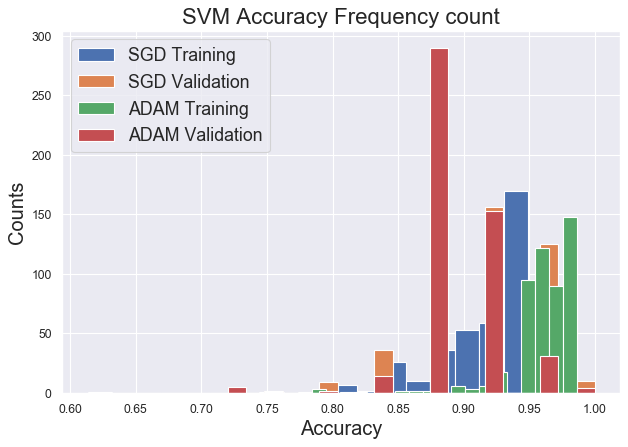

In [225]:
plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(tr_acc_sgd, bins=20, label='SGD Training')
plt.hist(va_acc_sgd, bins=20, label='SGD Validation') 
plt.hist(tr_acc_ad, bins=20, label='ADAM Training')
plt.hist(va_acc_ad, bins=20, label='ADAM Validation') 
plt.title("SVM Accuracy Frequency count", fontsize=20)
plt.ylabel('Counts', fontsize=18)
plt.xlabel('Accuracy', fontsize=18)
plt.legend(fontsize=16)
plt.savefig("svm_frequency.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

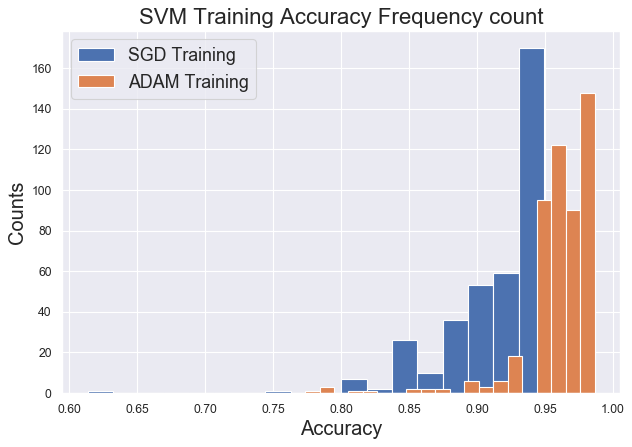

In [233]:
plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(tr_acc_sgd, bins=20, label='SGD Training')
plt.hist(tr_acc_ad, bins=20, label='ADAM Training')
plt.title("SVM Training Accuracy Frequency count", fontsize=20)
plt.ylabel('Counts', fontsize=18)
plt.xlabel('Accuracy', fontsize=18)
plt.legend(fontsize=16)
plt.savefig("svm_frequency_train.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

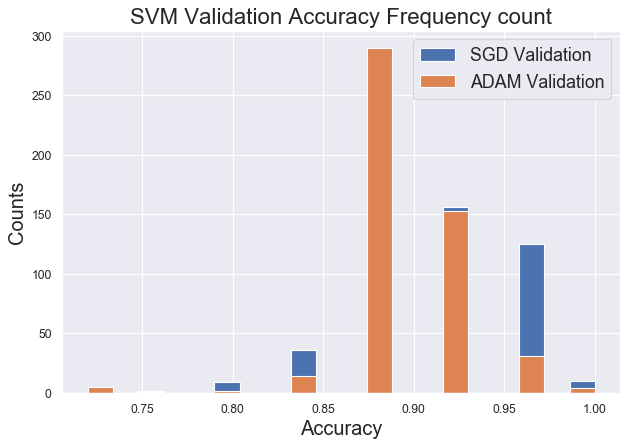

In [234]:
plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(va_acc_sgd, bins=20, label='SGD Validation') 
plt.hist(va_acc_ad, bins=20, label='ADAM Validation') 
plt.title("SVM Validation Accuracy Frequency count", fontsize=20)
plt.ylabel('Counts', fontsize=18)
plt.xlabel('Accuracy', fontsize=18)
plt.legend(fontsize=16)
plt.savefig("svm_frequency_valid.svg", format='svg', dpi=1200, bbox_inches='tight')
plt.show()

In [275]:
from collections import Counter

print("Train Acc SGD unique \n")
print(Counter(tr_acc_sgd))
print("Valid Acc SGD unique \n")
print(Counter(va_acc_sgd))
print("Train Acc ADAM unique \n")
print(Counter(tr_acc_ad))
print("Valid Acc ADAM unique \n")
print(Counter(va_acc_ad))

Train Acc SGD unique 

Counter({0.9466666666666667: 99, 0.9333333333333332: 71, 0.9733333333333333: 64, 0.96: 57, 0.9199999999999999: 52, 0.8933333333333334: 23, 0.9066666666666666: 20, 0.88: 20, 0.8533333333333334: 17, 0.9866666666666667: 14, 0.8933333333333332: 13, 0.9066666666666667: 10, 0.8666666666666667: 9, 0.84: 7, 0.92: 7, 0.8133333333333335: 3, 0.8799999999999999: 3, 0.8133333333333334: 2, 0.8400000000000002: 2, 0.8000000000000002: 2, 0.8266666666666668: 1, 0.6133333333333334: 1, 0.7466666666666667: 1, 0.8666666666666666: 1, 0.8266666666666667: 1})
Valid Acc SGD unique 

Counter({0.88: 161, 0.92: 156, 0.96: 125, 0.84: 36, 1.0: 10, 0.8: 9, 0.76: 2, 0.72: 1})
Train Acc ADAM unique 

Counter({0.9866666666666667: 148, 0.96: 122, 0.9466666666666667: 95, 0.9733333333333333: 90, 0.9333333333333332: 18, 0.9199999999999999: 6, 0.8933333333333334: 5, 0.9066666666666666: 3, 0.8533333333333334: 2, 0.7866666666666666: 2, 0.8666666666666667: 2, 0.7866666666666667: 1, 0.88: 1, 0.813333333333

### PCA Visualization

In [262]:
def hinge_loss2(y_pred, y_true):
    return torch.mean(torch.max(torch.tensor(0, dtype=torch.double, requires_grad=True), 1-y_pred*y_true))

def draw_margin(w, b, camera, x, y, xy, X):
    w = w.data.numpy()
    b = b.data.numpy()

    z = (w.dot(xy) + b).reshape(x.shape)
    z[np.where(z > 1.)] = 4
    z[np.where((z > 0.) & (z <= 1.))] = 3
    z[np.where((z > -1.) & (z <= 0.))] = 2
    z[np.where(z <= -1.)] = 1

    plt.scatter(x=X[:, 0], y=X[:, 1], c="black", s=10)
    plt.contourf(x, y, z, cmap=plt.cm.jet, alpha=0.5)
    camera.snap()

def svm_test_pca(X, Y, opt, w, b):
    dataset = data.TensorDataset(X, Y) # create your datset
    dataloader = data.DataLoader(dataset, batch_size=25, shuffle=True) # create your dataloader
    delta = 0.01
    x = np.arange(X[:, 0].min(), X[:, 0].max(), delta)
    y = np.arange(X[:, 1].min(), X[:, 1].max(), delta)
    x, y = np.meshgrid(x, y)
    xy = list(map(np.ravel, [x, y]))
    
    # Set up drawing
    fig = plt.figure(figsize=(5, 5))
    camera = Camera(fig)
    Eplot = np.zeros((100, 1))
    for epoch in range(100):
        errors = []
        for i, batch in enumerate(dataloader):
            opt.zero_grad()
            y_pred = svm(batch[0], w, b)
            output = hinge_loss2(y_pred, batch[1].double())
            output.backward()
            opt.step()
            errors.append(output.data.numpy())
        Eplot[epoch] = sum(errors)/(i+1)
        draw_margin(w, b, camera, x, y, xy, X)
    
    # create the animation and display it
    anim = camera.animate()
    plt.title("SVM Decision Boundary", fontsize=20)
    plt.xlabel("PC1", fontsize=18)
    plt.ylabel("PC2", fontsize=18)
    plt.close()
    
    print("Final Loss: ", Eplot[99])
    plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(Eplot)
    plt.title("Loss Plot", fontsize=20)
    plt.xlabel("Iteration Number", fontsize=18)
    plt.ylabel("Loss", fontsize=18)
    plt.show()
    
    return w, b, anim

In [263]:
def plot_dist(X, Y, slope, intercept, name):
    classes = [1, -1]
    colors = ['r', 'b']
    for clas, color in zip(classes, colors):
        plt.scatter(X[Y == clas][:, 0], 
                    X[Y == clas][:, 1], c = color)
    ax = plt.gca()
    ax.autoscale(False)
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + (slope * x_vals)
    plt.plot(x_vals, y_vals[0], c="k");
    plt.xlabel("X1", fontsize=18)
    plt.ylabel("X2", fontsize=18)
    plt.title('PCA SVM Class Boundary (' + name + ')', fontsize=20)
    plt.savefig(name+"_PCA.svg", format='svg', dpi=1200, bbox_inches='tight')
    plt.show()

In [264]:
pca = PCA(n_components=2)
alldata_pca = pca.fit_transform(alldata)
datatr_pca = alldata_pca[:75]
datava_pca = alldata_pca[75:]

#### SGD

Final Loss:  [0.1806975]


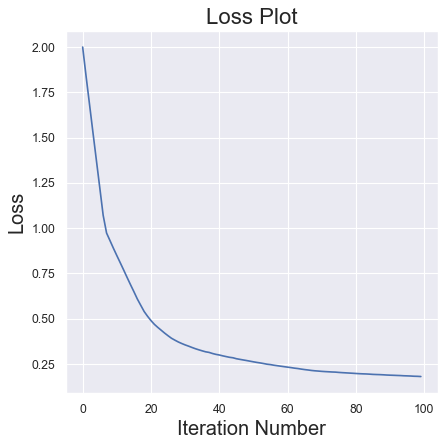

In [265]:
w = torch.randn(1, 2, requires_grad=True, dtype=torch.double)
b = torch.randn(1, requires_grad=True, dtype=torch.double)
opt = optim.SGD([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew, anim = svm_test_pca(torch.tensor(datatr_pca).double(), targetstr.double(), opt, w, b)
HTML(anim.to_html5_video())

In [266]:
y_target = svm(torch.tensor(datatr_pca).double(), wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetstr.detach().numpy(), y_target)

0.92

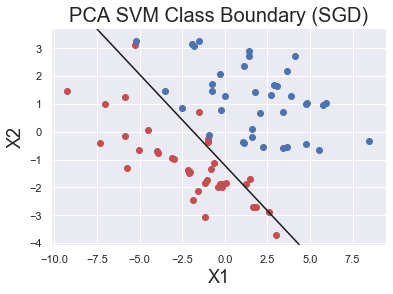

In [267]:
plot_dist(torch.tensor(datatr_pca).double(), targetstr.double(), 
          wnew.detach().numpy(), bnew.detach().numpy(), 'SGD')

In [268]:
y_target = svm(torch.tensor(datava_pca).double(), wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetsva.detach().numpy(), y_target)

0.92

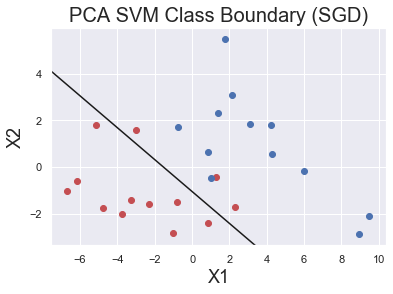

In [269]:
plot_dist(torch.tensor(datava_pca).double(), targetsva.double(), 
          wnew.detach().numpy(), bnew.detach().numpy(), 'SGD')

#### Adam

Final Loss:  [0.1106043]


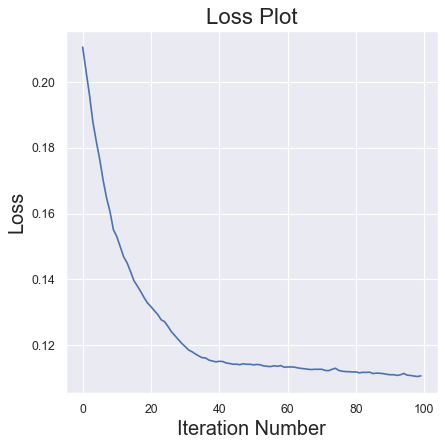

In [270]:
w = torch.randn(1, 2, requires_grad=True, dtype=torch.double)
b = torch.randn(1, requires_grad=True, dtype=torch.double)
opt = optim.Adam([w,b], lr=0.01, weight_decay=0.0001)
wnew, bnew, anim = svm_test_pca(torch.tensor(datatr_pca).double(), targetstr.double(), opt, w, b)
HTML(anim.to_html5_video())

In [271]:
y_target = svm(torch.tensor(datatr_pca).double(), wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetstr.detach().numpy(), y_target)

0.9333333333333333

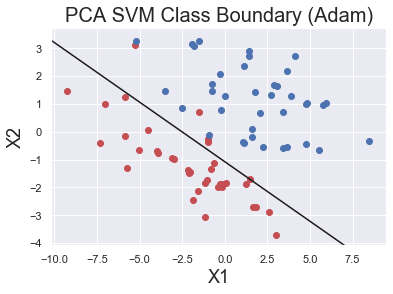

In [272]:
plot_dist(torch.tensor(datatr_pca).double(), targetstr.double(), 
          bnew.detach().numpy(), wnew.detach().numpy(), 'Adam')

In [273]:
y_target = svm(torch.tensor(datava_pca).double(), wnew, bnew)
y_target = [1 if i > 0 else -1 for i in y_target]
accuracy_score(targetsva.detach().numpy(), y_target)

0.92

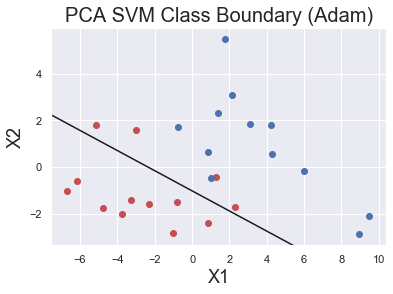

In [274]:
plot_dist(torch.tensor(datava_pca).double(), targetsva.double(), 
          bnew.detach().numpy(), wnew.detach().numpy(), 'Adam')